In [ ]:
!pip install kaggle --upgrade

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json


chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!pip install kaggle
!pip install opendatasets
!pip install pandas

In [ ]:

import opendatasets as od
import pandas

od.download(
	"https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: luizadas
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000


100%|██████████| 5.20G/5.20G [01:07<00:00, 83.2MB/s]


In [ ]:
import os
from glob import glob
import pandas as pd

base_skin_dir = os.path.join('..', '/content/skin-cancer-mnist-ham10000/')
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}


In [ ]:
base_skin_dir

'/content/skin-cancer-mnist-ham10000/'

In [ ]:
imageid_path_dict

{'ISIC_0028971': '/content/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0028971.jpg',
 'ISIC_0026510': '/content/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0026510.jpg',
 'ISIC_0026631': '/content/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0026631.jpg',
 'ISIC_0025595': '/content/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025595.jpg',
 'ISIC_0024569': '/content/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0024569.jpg',
 'ISIC_0027550': '/content/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0027550.jpg',
 'ISIC_0026684': '/content/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0026684.jpg',
 'ISIC_0028528': '/content/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0028528.jpg',
 'ISIC_0025978': '/content/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025978.jpg',
 'ISIC_0028711': '/content/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0028711.jpg',
 'ISIC_0025664': '/content/skin-cancer-m

In [ ]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

skin_df = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata.csv'))
skin_df['path'] = skin_df['image_id'].map(imageid_path_dict.get)
skin_df['cell_type'] = skin_df['dx'].map(lesion_type_dict.get)
skin_df['cell_type_idx'] = pd.Categorical(skin_df['cell_type']).codes

In [ ]:
skin_df['path']

,path
0,/content/skin-cancer-mnist-ham10000/ham10000_i...
1,/content/skin-cancer-mnist-ham10000/ham10000_i...
2,/content/skin-cancer-mnist-ham10000/ham10000_i...
3,/content/skin-cancer-mnist-ham10000/ham10000_i...
4,/content/skin-cancer-mnist-ham10000/HAM10000_i...
...,...
10010,/content/skin-cancer-mnist-ham10000/HAM10000_i...
10011,/content/skin-cancer-mnist-ham10000/HAM10000_i...
10012,/content/skin-cancer-mnist-ham10000/HAM10000_i...
10013,/content/skin-cancer-mnist-ham10000/HAM10000_i...


In [ ]:
skin_df['image_id']

,image_id
0,ISIC_0027419
1,ISIC_0025030
2,ISIC_0026769
3,ISIC_0025661
4,ISIC_0031633
...,...
10010,ISIC_0033084
10011,ISIC_0033550
10012,ISIC_0033536
10013,ISIC_0032854


In [ ]:
skin_df.isnull().sum()
# print(skin_df.isnull().sum())
skin_df['age'].fillna((skin_df['age'].mean()), inplace=True)
skin_df.isnull().sum()
print(skin_df.dtypes)

lesion_id         object
image_id          object
dx                object
dx_type           object
age              float64
sex               object
localization      object
path              object
cell_type         object
cell_type_idx       int8
dtype: object


<Axes: xlabel='cell_type'>

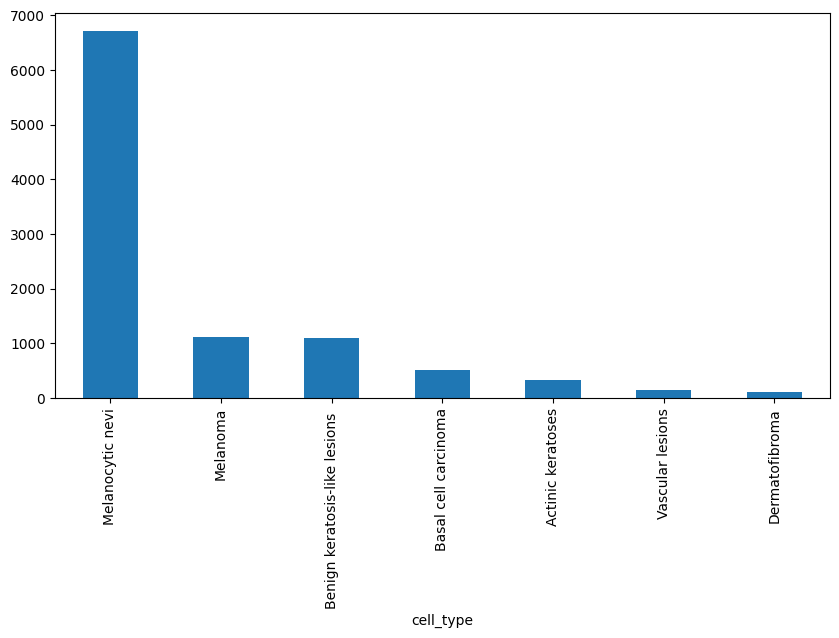

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
skin_df['cell_type'].value_counts().plot(kind='bar', ax=ax1)

<Axes: xlabel='localization'>

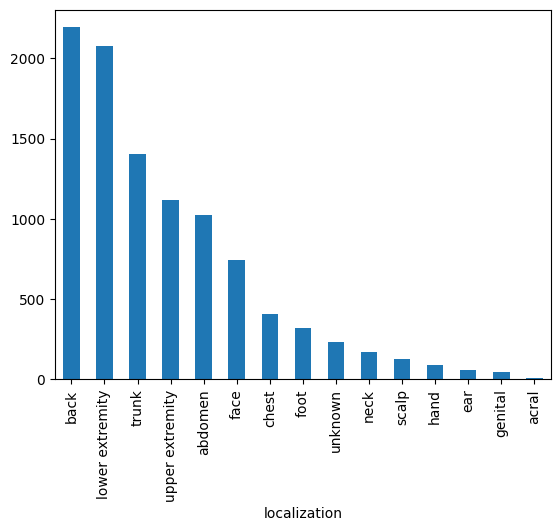

In [ ]:
skin_df['localization'].value_counts().plot(kind='bar')


<Axes: >

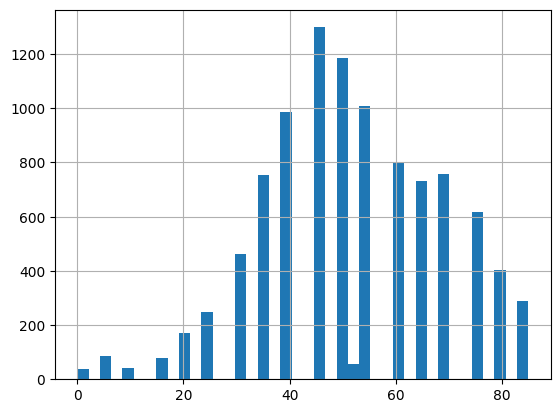

In [ ]:
skin_df['age'].hist(bins=40)


In [ ]:
import numpy as np
from PIL import Image
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((128,96))))

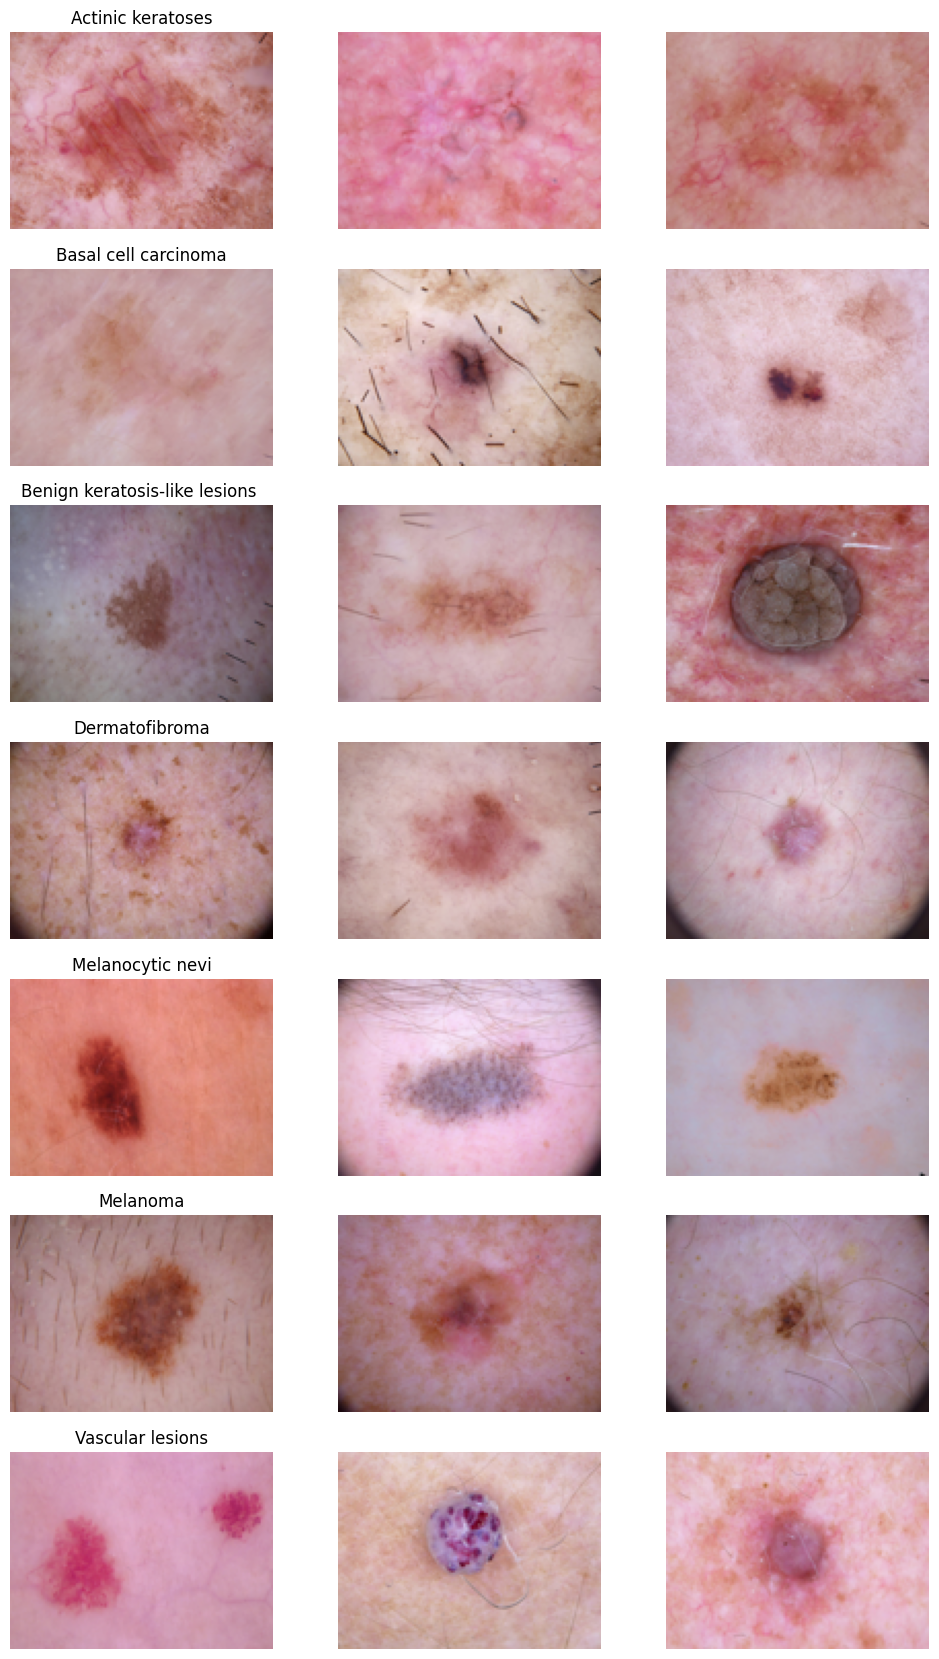

In [ ]:
n_samples = 3
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs,
                                         skin_df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

In [ ]:
skin_df['image'].map(lambda x: x.shape).value_counts()


,count
image,
"(96, 128, 3)",10015


In [ ]:
features = skin_df.drop(columns=['cell_type_idx'],axis=1)
target = skin_df['cell_type_idx']

In [ ]:
from sklearn.model_selection import train_test_split
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.30,
                                                            random_state=1234)

In [ ]:
x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [ ]:
import tensorflow
from tensorflow.keras.utils import to_categorical



In [ ]:
y_train = to_categorical(y_train_o, num_classes = 7)
y_test = to_categorical(y_test_o, num_classes = 7)

In [ ]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.3, random_state = 2)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], *(96, 128, 3))
x_test = x_test.reshape(x_test.shape[0], *(96, 128, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(96, 128, 3))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

datagen.fit(x_train)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras import backend as K

CLASSES = 7
EPOCHS = 10
BATCH_SIZE = 6

# create the base pre-trained model
base_model = VGG16(weights='imagenet', include_top=False)



In [ ]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(128, activation='relu')(x)
# add Dropout layer to reduce overfitting
x = Dropout(0.2)(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(CLASSES, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          65,6

 Total params: 14,781,255 (56.39 MB)

 Trainable params: 14,781,255 (56.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

# train the model on the new data for a few epochs
history = model.fit(datagen.flow(x_train, y_train, batch_size=BATCH_SIZE),
                    epochs=EPOCHS,
                    validation_data=(x_validate, y_validate),
                    verbose=1,
                    # steps_per_epoch=x_train.shape[0] // BATCH_SIZE,
                    callbacks=[learning_rate_reduction])

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


818/818 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.6713 - loss: 1.0309 - val_accuracy: 0.7033 - val_loss: 0.8769 - learning_rate: 0.0010
Epoch 2/10
818/818 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.7029 - loss: 0.8478 - val_accuracy: 0.7128 - val_loss: 0.8489 - learning_rate: 0.0010
Epoch 3/10
818/818 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.7150 - loss: 0.7982 - val_accuracy: 0.7147 - val_loss: 0.8121 - learning_rate: 0.0010
Epoch 4/10
818/818 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.7355 - loss: 0.7541 - val_accuracy: 0.7152 - val_loss: 0.8325 - learning_rate: 0.0010
Epoch 5/10
818/818 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.7415 - loss: 0.7546 - val_accuracy: 0.7318 - val_loss: 0.9086 - learning_rate: 0.0010
Epoch 6/10
818/818 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.7249 - loss: 0.7625 - val_accuracy: 0.7394 - val_loss: 0.8427 - learning_rate: 0.0010
Epoch 7/10
818/818 ━━━━━━━━━━━━━━━━━━━━ 45s 33ms/step - accuracy: 0.7285 - loss: 0.7530

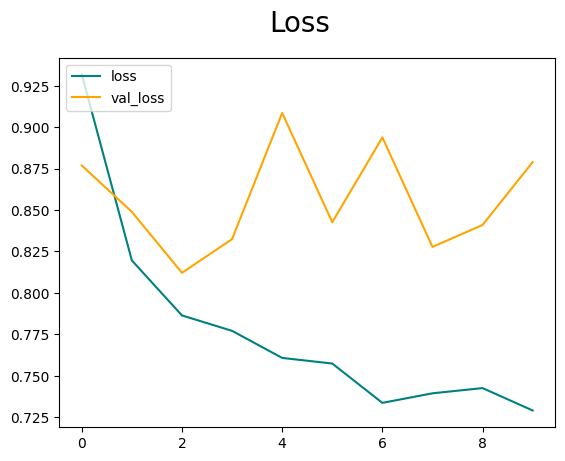

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

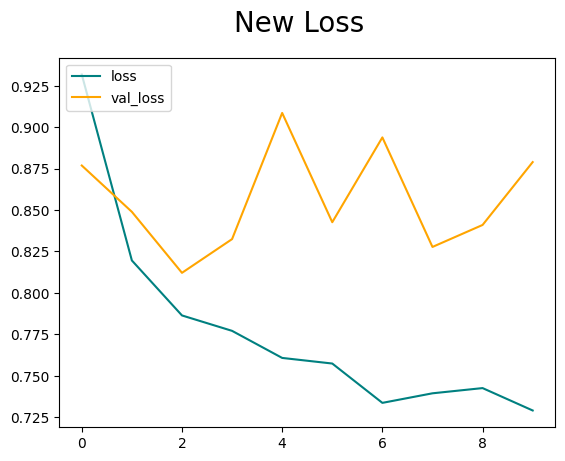

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('New Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

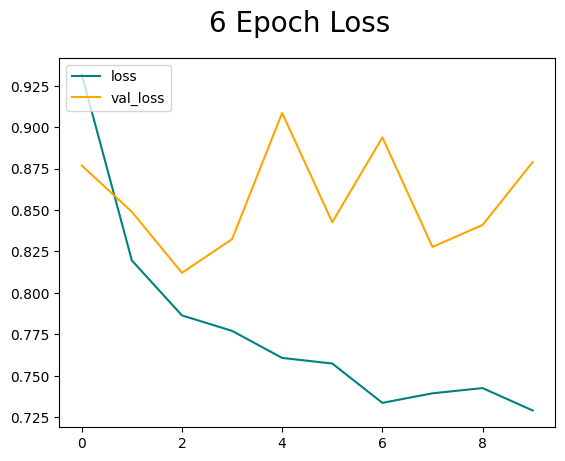

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('6 Epoch Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

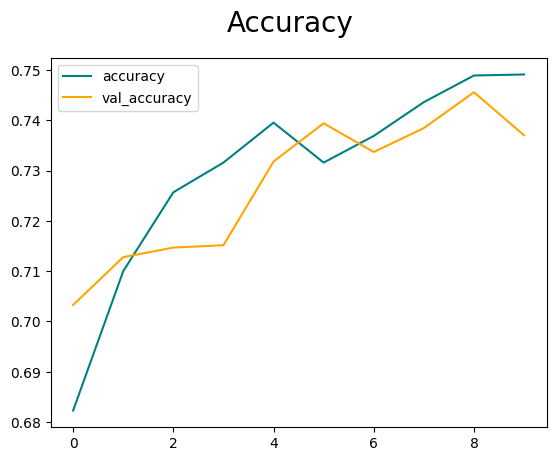

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

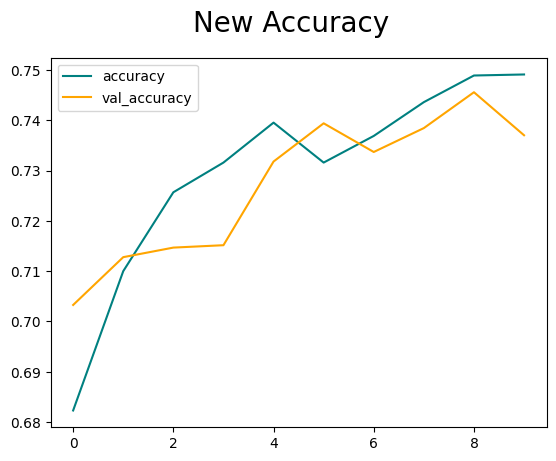

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('New Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

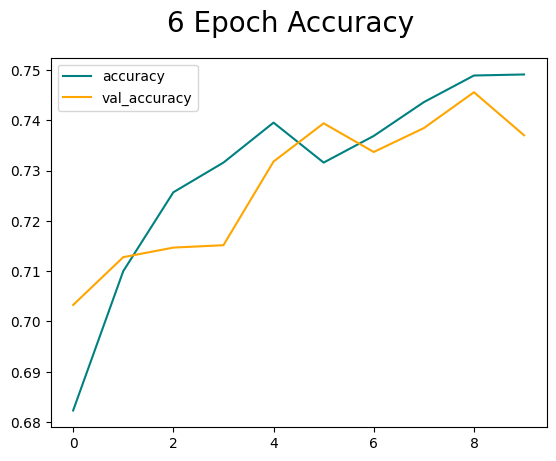

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('6 Epoch Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

0 input_layer_2
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool


In [ ]:
from keras.optimizers import SGD
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model.fit(datagen.flow(x_train,y_train, batch_size=BATCH_SIZE))

818/818 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.7620 - loss: 0.6833


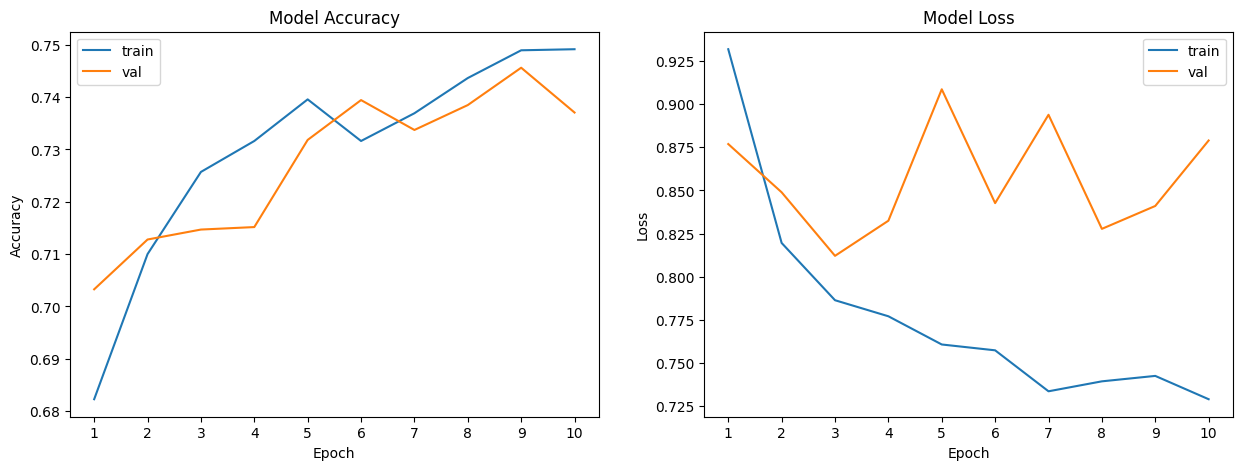

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_model_history(model_history):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Summarize history for accuracy
    axs[0].plot(range(1, len(model_history.history['accuracy']) + 1), model_history.history['accuracy'])
    axs[0].plot(range(1, len(model_history.history['val_accuracy']) + 1), model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1, len(model_history.history['accuracy']) + 1, max(1, len(model_history.history['accuracy']) // 10)))
    axs[0].legend(['train', 'val'], loc='best')

    # Summarize history for loss
    axs[1].plot(range(1, len(model_history.history['loss']) + 1), model_history.history['loss'])
    axs[1].plot(range(1, len(model_history.history['val_loss']) + 1), model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1, len(model_history.history['loss']) + 1, max(1, len(model_history.history['loss']) // 10)))
    axs[1].legend(['train', 'val'], loc='best')

    plt.show()

plot_model_history(history)

66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step


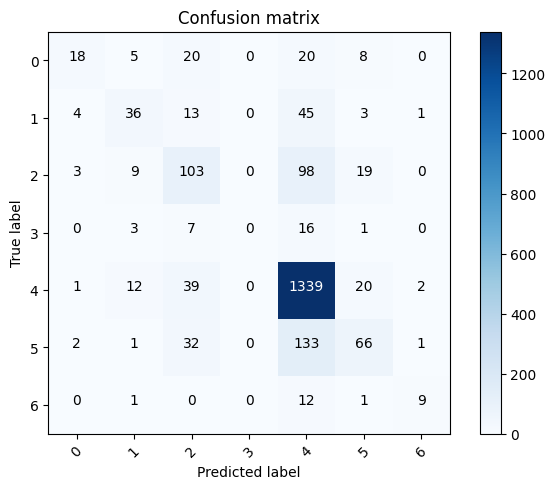

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_validate)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_validate,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)



# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7))

Text(0, 0.5, 'Fraction classified incorrectly')

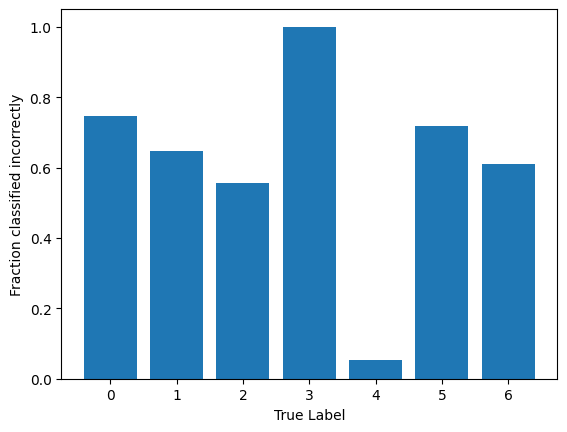

In [ ]:
label_frac_error = 1 - np.diag(confusion_mtx) / np.sum(confusion_mtx, axis=1)
plt.bar(np.arange(7),label_frac_error)
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7477 - loss: 0.7956
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7534 - loss: 0.8006
Validation: accuracy = 0.747028  ;  loss_v = 0.818165
Test: accuracy = 0.747421  ;  loss = 0.791834


In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input


img_list = [
    skin_df['image'][6410],
    skin_df['image'][2310],
    skin_df['image'][1530],
    skin_df['image'][4191],
    skin_df['image'][1],
]

validation_batch = np.stack([preprocess_input(img) for img in img_list])

pred = model.predict(validation_batch)
for p in pred:
    print(list(map(lambda x: x * 100, p)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
[0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 100.0, 3.33605994713136e-31, 0.0]
[0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0]


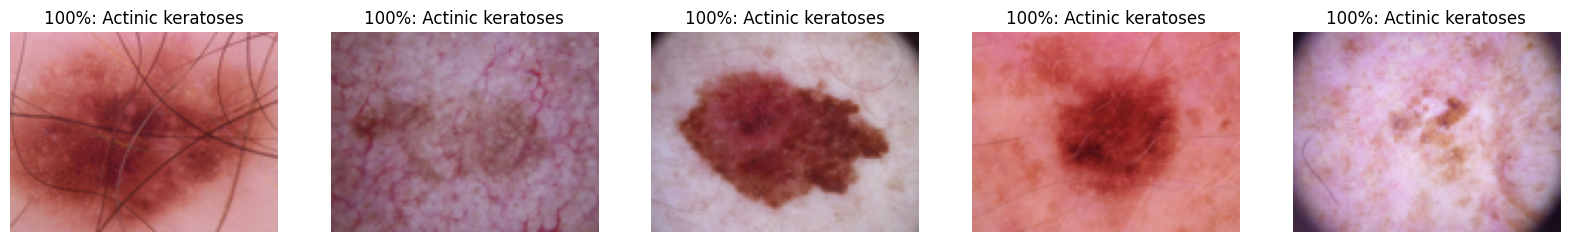

In [ ]:
import numpy as np

classes = [
    'Melanocytic nevi',
    'Melanoma',
    'Benign keratosis-like lesions ',
    'Basal cell carcinoma',
    'Actinic keratoses',
    'Vascular lesions',
    'Dermatofibroma'
]

fig, axs = plt.subplots(1, len(img_list), figsize=(20, 5))
for i, img in enumerate(img_list):
    ax = axs[i]
    ax.axis('off')
    p_idx = np.argmax(pred[i])
    title = "{:.0f}%: {:}".format(100*pred[i,p_idx], classes[p_idx])
    ax.set_title(title)
    ax.imshow(img)